In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

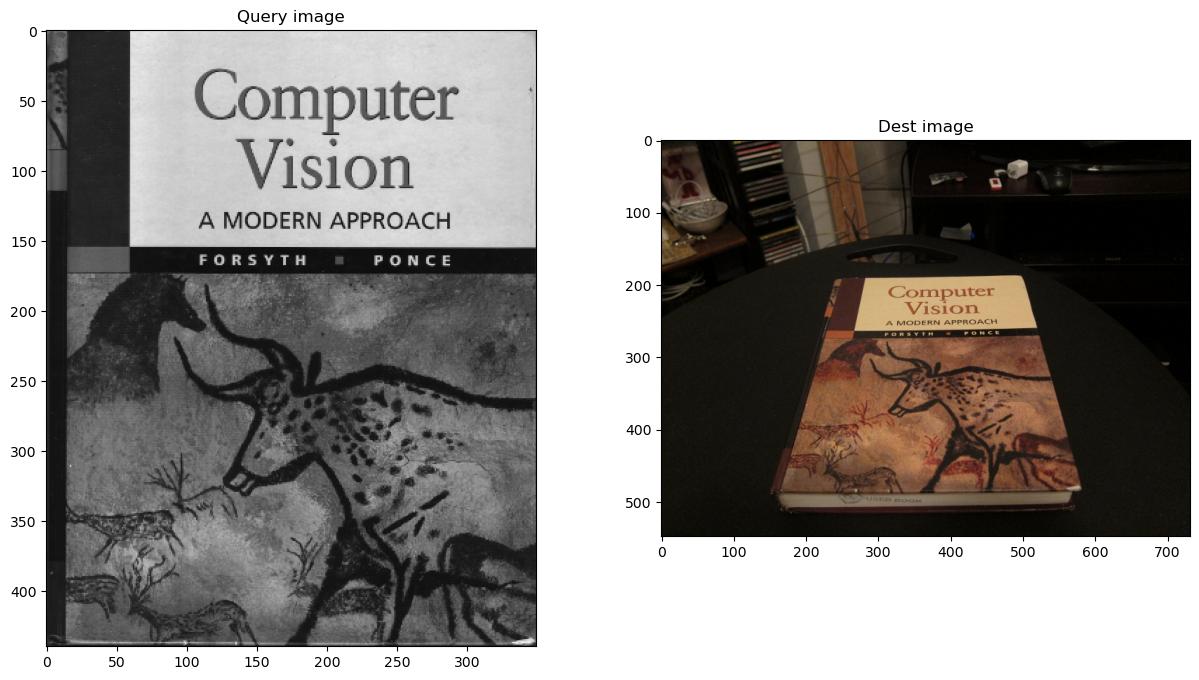

In [2]:
queryImage = '../chapter_1/Chapter_1_source_code/Chapter_1/data/cv_cover.jpg'
trainImage = '../chapter_1/Chapter_1_source_code/Chapter_1/data/cv_desk.png'

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(cv.imread(queryImage), cv.COLOR_BGR2RGB))
plt.title('Query image')
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(cv.imread(trainImage), cv.COLOR_BGR2RGB))
plt.title('Dest image')
plt.show()

img1 = cv.imread(queryImage, cv.IMREAD_GRAYSCALE)
img2 = cv.imread(trainImage, cv.IMREAD_GRAYSCALE)

In [3]:
# Initiate ORB detector : ORB(Oriented FAST and Rotated BRIEF)는 객체 인식, 추적 및 이미지 정합을 위해 컴퓨터 비전에서 사용되는 특징 감지 알고리즘입니다.
orb = cv.ORB_create()

# ORB

ORB는 여러 이미지에서 독특하고 반복 가능한 이미지의 주요 지점(관심 지점 또는 모서리라고도 함)을 식별하는 특징 감지기 유형입니다. 이러한 핵심 사항은 컴퓨터 비전 응용 프로그램에서 이미지와 개체를 일치시키는 데 중요합니다. ORB는 또한 각 키 포인트에 대한 디스크립터를 추출합니다. 이는 해당 키 포인트 주변의 로컬 이미지 콘텐츠를 설명하는 간단한 이진 문자열입니다.


다른 기능 감지 알고리즘에 비해 ORB의 장점 중 하나는 속도와 효율성입니다. 피라미드 스케일 공간 접근 방식을 사용하여 다양한 스케일에서 기능을 감지하고 수정된 버전의 FAST 알고리즘을 사용하여 핵심 포인트를 감지합니다. 또한 BRIEF 알고리즘을 사용하여 SIFT 또는 SURF와 같은 다른 설명자 방법보다 계산 속도가 훨씬 빠른 키 포인트에 대한 설명자를 계산합니다.


ORB의 또 다른 장점은 회전 및 스케일 변경에 대한 견고성입니다. 방향 할당이라는 기술을 사용하여 각 키 포인트의 주요 방향을 계산하여 이미지의 회전 및 크기 변경을 처리할 수 있습니다.


전반적으로 ORB는 개체 인식, 추적 및 이미지 등록을 위해 컴퓨터 비전 응용 프로그램에서 널리 사용되는 강력하고 효율적인 기능 감지기입니다.



In [4]:
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2, None)

# BFMatcher object

OpenCV의 'BFMatcher' 개체는 두 집합의 키 포인트와 설명자 간의 기능 일치에 사용되는 무차별 대입 일치자입니다. 개체 인식, 이미지 검색 및 파노라마 스티칭과 같은 다양한 컴퓨터 비전 작업에 사용되는 OpenCV의 기능 일치 모듈의 일부입니다.


'BFMatcher' 객체는 거리 측정 방법과 교차 확인 부울 매개변수를 지정하여 생성됩니다. 거리 측정 방법은 사용되는 디스크립터의 유형에 따라 유클리드 거리, L1 거리 또는 해밍 거리가 될 수 있습니다. 교차 확인 매개변수는 잘못된 일치를 필터링하는 데 사용되는 기술인 교차 확인을 활성화 또는 비활성화하는 데 사용됩니다.


'BFMatcher' 개체가 생성되면 두 키 포인트 집합의 설명자를 일치시키는 데 사용할 수 있습니다. 매처는 두 키 포인트 세트의 설명자인 두 개의 인수를 받고 일치 목록을 반환합니다. 각 일치 항목은 'DMatch' 객체로 표현되며, 여기에는 두 세트에서 일치하는 키 포인트의 인덱스와 두 설명자 사이의 유사성을 나타내는 거리 값이 포함됩니다.

In [6]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their destance.
matches = sorted(matches, key = lambda x:x.distance)

이 코드는 OpenCV에서 'BFMatcher' 객체를 사용하여 두 세트의 키 포인트 설명자 간의 기능 일치를 사용한 예입니다.

첫 번째 줄은 해밍 거리를 거리 측정 방법으로 사용하고 'crossCheck' 매개변수를 'True'로 설정하여 교차 확인을 활성화하는 'BFMatcher' 객체를 생성합니다.

'match' 함수는 키 포인트의 두 집합(des1 및 des2)의 설명자를 가져와 두 집합 간의 일치 목록을 반환합니다. 결과 일치 항목은 정렬 기준으로 거리를 지정하는 람다 함수를 사용하는 sorted 함수와 key 매개변수를 사용하여 거리 값을 기준으로 정렬됩니다.

결과 '일치' 목록에는 'DMatch' 유형의 개체가 포함되어 있으며, 여기에는 두 세트에서 일치하는 키 포인트의 인덱스와 두 설명자 간의 유사성을 나타내는 거리 값이 포함됩니다.

전반적으로 이 코드는 OpenCV에서 키 포인트 설명자를 일치시키기 위해 'BFMatcher' 개체를 사용하는 기본 예제이며 개체 인식, 이미지 검색 및 파노라마 스티칭과 같은 작업에 유용할 수 있습니다.

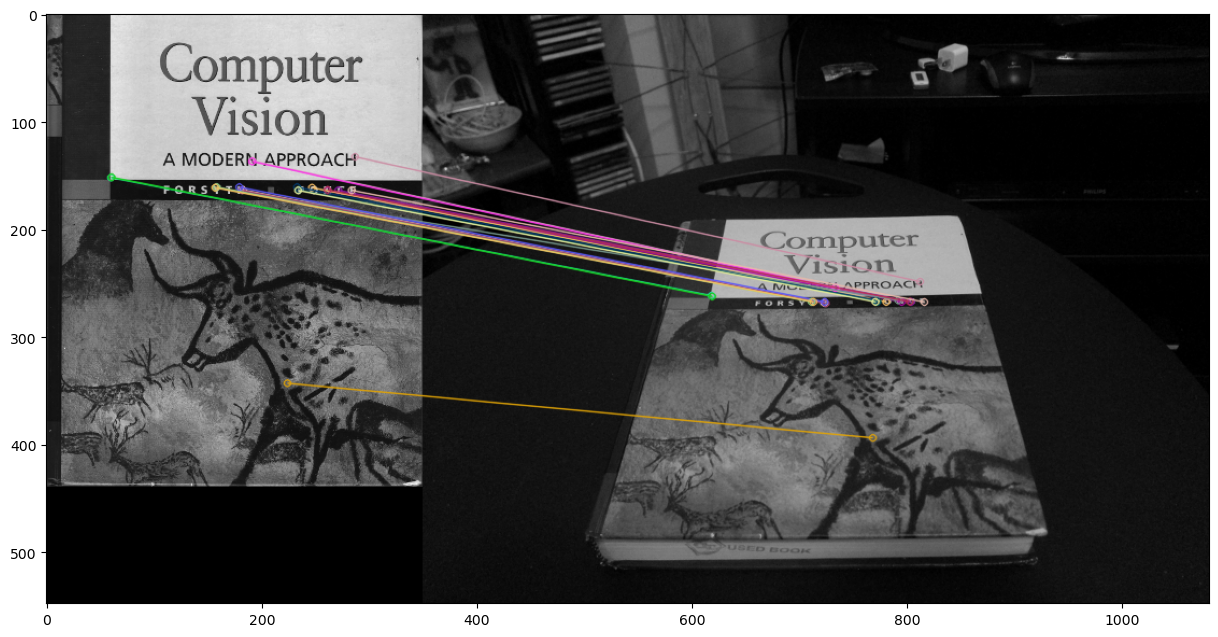

In [9]:
# Draw first 10 matchs.
img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:20], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15,8))
plt.imshow(img3)
plt.show()

이 코드는 OpenCV drawMatches() 함수를 사용하여 ORB 감지기(kp1 및 kp2)에 의해 감지된 키 포인트와 해당 설명자. 다섯 번째 인수로 전달된 'matches' 목록에는 두 세트에서 일치하는 키 포인트의 인덱스와 해당 거리 값이 포함됩니다.


결과 이미지 'img3'은 일치 항목의 시각화이며 각 일치 항목은 두 이미지의 핵심 지점을 연결하는 선으로 표시됩니다. 'None' 인수는 출력 이미지가 제공되지 않고 OpenCV가 결과에 대한 새 이미지를 생성하도록 지정합니다. flags 인수는 시각화를 위한 추가 옵션을 지정합니다. 이 경우 cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS는 일치하는 점만 그리고 다른 일치하지 않는 점은 그리지 않는 데 사용됩니다.

# Additional part : Find homography and warping

In [13]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)
for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

h, mask = cv.findHomography(points1, points2, cv.RANSAC)

height, width = img2.shape

im1_warped = cv.warpPerspective(img1, h, (width, height))

처음 두 줄은 크기가 (len(matches), 2)인 두 개의 NumPy 배열(points1 및 points2)을 dtype=np.float32로 초기화합니다. 이 배열은 두 이미지에서 일치하는 키 포인트의 x,y 좌표를 보유합니다.

for 루프에서 enumerate 함수는 matches 목록의 각 일치 항목을 반복하는 데 사용됩니다. 일치할 때마다 첫 번째(img1) 및 두 번째(img2) 이미지에 있는 키 포인트의 x,y 좌표는 인덱스(queryIdx 및 trainIdx)를 사용하여 검색됩니다. 이러한 좌표는 해당 배열(points1 및 points2)에 float32 값으로 저장됩니다.

'cv.findHomography()' 함수는 두 개의 일치점 배열과 'cv.RANSAC' 메서드로 호출되어 호모그래피 행렬 'h'를 추정합니다. 이 행렬은 'img1'의 점을 'img2'의 해당 점에 매핑하는 변환을 나타냅니다.

그런 다음 'img2'의 'height'와 'width'가 추출되어 'cv.warpPerspective()' 함수를 사용하여 'img1'을 'img2'와 정렬하도록 뒤틀기 위해 사용됩니다. 결과 im1_warped 이미지는 img1의 정렬된 버전이며 이미지 스티칭 및 파노라마 생성과 같은 작업에 사용할 수 있습니다.

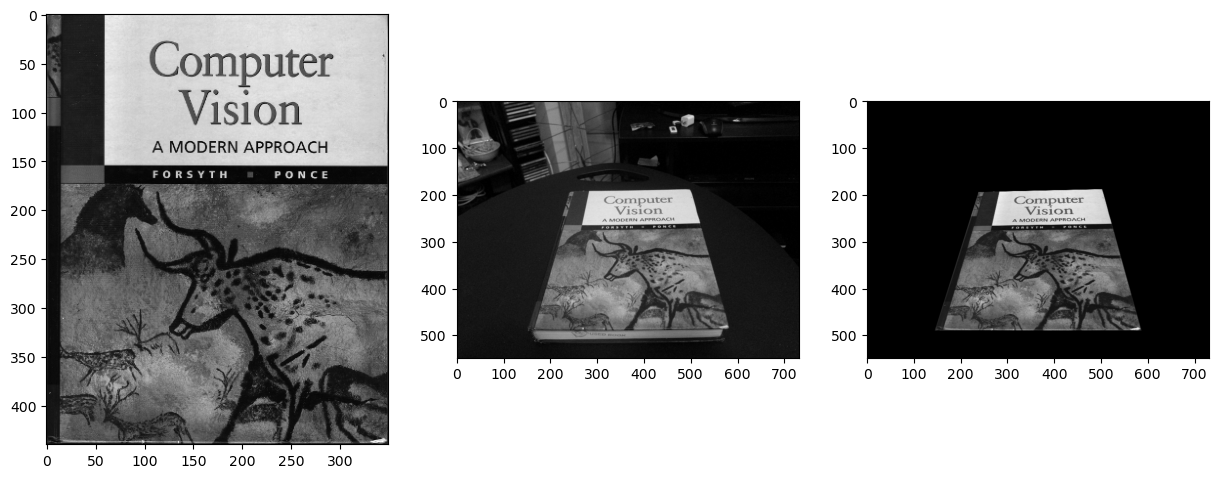

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.imshow(img1, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img2, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(im1_warped, cmap='gray')
plt.show()

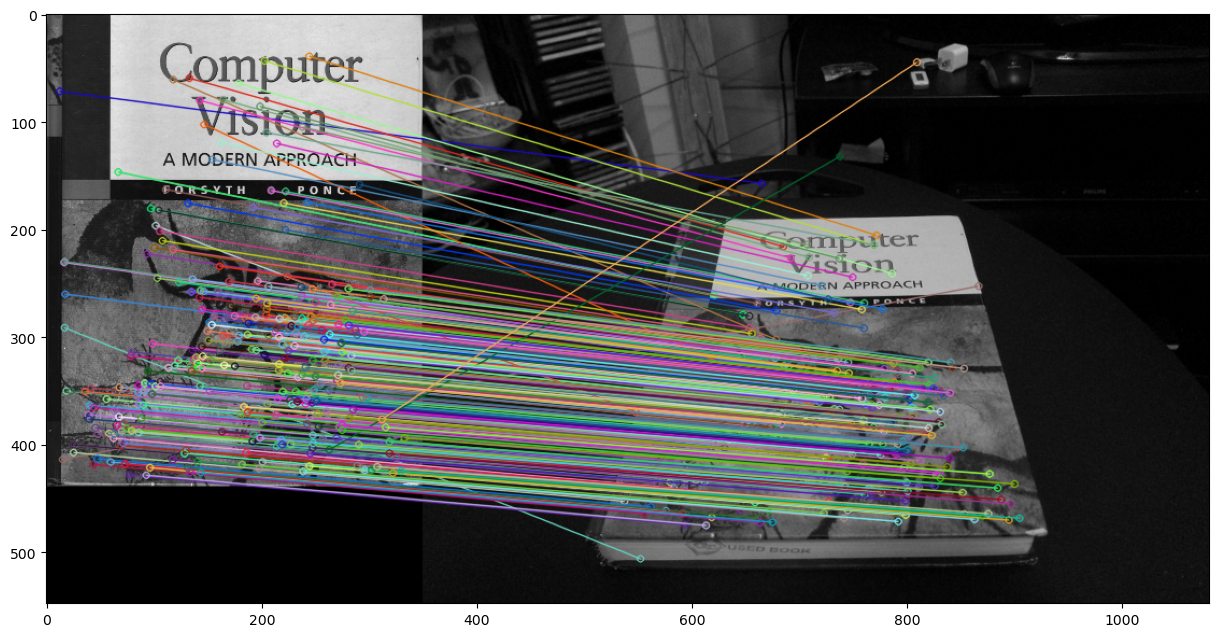

In [15]:
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15,8))
plt.imshow(img3)
plt.show()